<a href="https://colab.research.google.com/github/Sreeya22/Traffic-Sign-Classification-with-PyQt5-and-Keras/blob/main/trafficsign_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [ ]:
import os
from PIL import Image
import numpy as np

# Ensure drive is mounted
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/Train'

# Check the current path
print("Dataset path:", dataset_path)

# Load images and labels
data = []
labels = []
classes = 43  # Number of classes

class_labels = { 1: "Speed limit (20km/h)",
    2: "Speed limit (30km/h)",
    3: "Speed limit (50km/h)",
    4: "Speed limit (60km/h)",
    5: "Speed limit (70km/h)",
    6: "Speed limit (80km/h)",
    7: "End of speed limit (80km/h)",
    8: "Speed limit (100km/h)",
    9: "Speed limit (120km/h)",
    10: "No passing",
    11: "No passing veh over 3.5 tons",
    12: "Right-of-way at intersection",
    13: "Priority road",
    14: "Yield",
    15: "Stop",
    16: "No vehicles",
    17: "Veh > 3.5 tons prohibited",
    18: "No entry",
    19: "General caution",
    20: "Dangerous curve left",
    21: "Dangerous curve right",
    22: "Double curve",
    23: "Bumpy road",
    24: "Slippery road",
    25: "Road narrows on the right",
    26: "Road work",
    27: "Traffic signals",
    28: "Pedestrians",
    29: "Children crossing",
    30: "Bicycles crossing",
    31: "Beware of ice/snow",
    32: "Wild animals crossing",
    33: "End speed + passing limits",
    34: "Turn right ahead",
    35: "Turn left ahead",
    36: "Ahead only",
    37: "Go straight or right",
    38: "Go straight or left",
    39: "Keep right",
    40: "Keep left",
    41: "Roundabout mandatory",
    42: "End of no passing",
    43: "End no passing veh > 3.5 tons" }

print("Obtaining Images & its Labels..............")
for i in range(classes):
    path = os.path.join(dataset_path, str(i))
    if not os.path.exists(path):
        print(f"Directory not found: {path}")
        continue

    images = os.listdir(path)

    for img_file in images:
        try:
            image = Image.open(os.path.join(path, img_file))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print(f"{img_file} Loaded")
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

print("Dataset Loaded")
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)


Streaming output truncated to the last 5000 lines.
00009_00048_00008.png Loaded
00009_00048_00010.png Loaded
00009_00048_00017.png Loaded
00009_00048_00020.png Loaded
00009_00048_00018.png Loaded
00009_00048_00014.png Loaded
00009_00048_00006.png Loaded
00009_00048_00009.png Loaded
00009_00048_00007.png Loaded
00009_00048_00026.png Loaded
00009_00048_00028.png Loaded
00009_00048_00027.png Loaded
00009_00048_00022.png Loaded
00009_00048_00023.png Loaded
00009_00048_00025.png Loaded
00009_00048_00021.png Loaded
00009_00048_00029.png Loaded
00009_00048_00024.png Loaded
00009_00000_00002.png Loaded
00009_00000_00000.png Loaded
00009_00000_00001.png Loaded
00009_00000_00010.png Loaded
00009_00000_00007.png Loaded
00009_00000_00006.png Loaded
00009_00000_00004.png Loaded
00009_00000_00005.png Loaded
00009_00000_00016.png Loaded
00009_00000_00003.png Loaded
00009_00000_00013.png Loaded
00009_00000_00017.png Loaded
00009_00000_00011.png Loaded
00009_00000_00014.png Loaded
00009_00000_00009.png

In [ ]:
# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)
print("Labels shape:", labels.shape)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


Data shape: (13130, 30, 30, 3)
Labels shape: (13130,)
Train data shape: (10504, 30, 30, 3)
Test data shape: (2626, 30, 30, 3)
Train labels shape: (10504,)
Test labels shape: (2626,)


(10504, 30, 30, 3) (2626, 30, 30, 3) (10504,) (2626,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 46s 127ms/step - accuracy: 0.3500 - loss: 4.0620 - val_accuracy: 0.8884 - val_loss: 0.5122
Epoch 2/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 42s 128ms/step - accuracy: 0.8078 - loss: 0.6401 - val_accuracy: 0.9608 - val_loss: 0.1664
Epoch 3/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.8789 - loss: 0.4043 - val_accuracy: 0.9745 - val_loss: 0.1216
Epoch 4/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 79s 121ms/step - accuracy: 0.9104 - loss: 0.3123 - val_accuracy: 0.9817 - val_loss: 0.0833
Epoch 5/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 43s 128ms/step - accuracy: 0.9270 - loss: 0.2531 - val_accuracy: 0.9813 - val_loss: 0.0729
Epoch 6/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 42s 127ms/step - accuracy: 0.9353 - loss: 0.2101 - val_accuracy: 0.9863 - val_loss: 0.0621
Epoch 7/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 83s 130ms/step - accuracy: 0.9422 - loss: 0.2076 - val_accuracy: 0.9798 - val_loss: 0.0696
Epoch 8/15
329/329 ━━━━━━━━━━━━━━━━━━━━ 79s 120ms/step - accuracy: 0.9421 - loss: 0

Model Saved


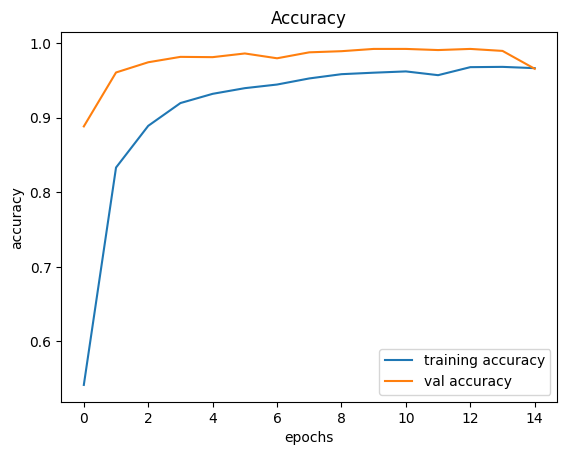

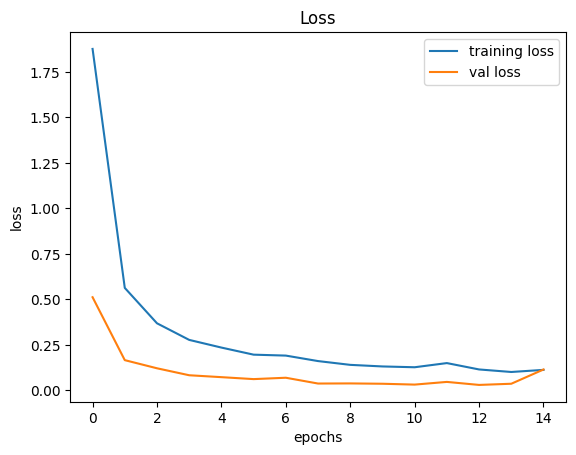

In [ ]:
# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=15, validation_data=(X_test, y_test))
model.save("/content/drive/MyDrive/my_model.h5")
print("Model Saved")

# Plotting accuracy and loss
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('/content/drive/MyDrive/Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('/content/drive/MyDrive/Loss.png')
